In [61]:

import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import os


dimen=12
center=50
radius=2  
minCut=0
maxCut=dimen-1

def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]):
        yield x, y
        
def cordtoindex(cordinates,dimen):
    index_list=[]
    for ind in cordinates:
        x=ind[0]
        y=ind[1]
        index_list.append((x*dimen)+y)
    return index_list
        
def regionmappingindex(dimen,center,radius=5,minCut=0):
    x = center// dimen
    y = center % dimen
    center=[x,y]
    print('center',center)
    maxCut=dimen-1
    k=  np.array(list(points_in_circle_np(radius,center[0],center[1])))
    ## Avoid Negative 
    k_mask = (k >=0).all(axis=1)
    k= k[k_mask,:]
    ## Avoid out of boundary
    k_mask = (k <=maxCut).all(axis=1)
    k= k[k_mask,:]

    #k[k[...,:]>= 0]
    regionMap=np.zeros((dimen,dimen))
    regionMap[tuple(k.T)]=1
    fig, ax = plt.subplots()
    im = ax.imshow(regionMap)
    array = [(ix,iy) for ix, row in enumerate(regionMap) for iy, i in enumerate(row) if i == 1]
    indexlist=cordtoindex(array,dimen)
    return indexlist

def exactmatchregion(indexlist,pop_NA):
    pop_NA=pop_NA.flatten()
    matchvalue=pop_NA[indexlist]
    print(matchvalue)
    status=sum(matchvalue)
    if status!=0:
        return 0
    else:
        return 1


center [4, 2]
[26, 37, 38, 39, 48, 49, 50, 51, 52, 61, 62, 63, 74]
[0 0 0 0 1 0 0 0 0 0 0 1 0]


0

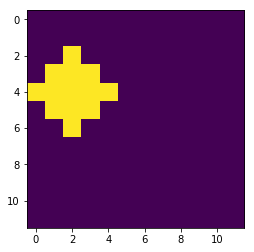

In [62]:
indlist=regionmappingindex(dimen,center,radius,minCut=0)
print(indlist)
exactmatchregion(indlist,pop_NA)

In [13]:
#pop_NA=np.genfromtxt('../python/data/init_data/init_0_NA.dat', delimiter="  ", dtype=np.int32)

In [14]:
#pop_NA[pop_NA==2]=0

In [16]:
#pop_NA.shape

(100, 144)

In [63]:
pop_NA

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [21]:
import pandas as pd
d1=pd.DataFrame(regionMap)

In [22]:
d1.loc[(d1.sum(axis=1) != 0)]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


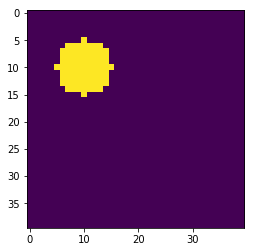

In [23]:
import seaborn as sns
import matplotlib.pylab as plt
fig, ax = plt.subplots()
im = ax.imshow(regionMap)

In [3]:
regionMap

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])